In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers
import numpy as np
import tensorflow as tf

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\roblima\Anaconda3\envs\tf_no_gpu\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\roblima\Anaconda3\envs\tf_no_gpu\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 129us/sample - loss: 2.6954 - accuracy: 0.5173 - val_loss: 1.7766 - val_accuracy: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 64us/sample - loss: 1.4666 - accuracy: 0.6908 - val_loss: 1.3436 - val_accuracy: 0.6970
Epoch 3/20
7982/7982 [==============================] - 1s 65us/sample - loss: 1.0838 - accuracy: 0.7706 - val_loss: 1.1602 - val_accuracy: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 65us/sample - loss: 0.8523 - accuracy: 0.8185 - val_loss: 1.0463 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 66us/sample - loss: 0.6798 - accuracy: 0.8559 - val_loss: 0.9801 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 69us/sample - loss: 0.5412 - accuracy: 0.8855 - val_loss: 0.9275 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 66us/sampl

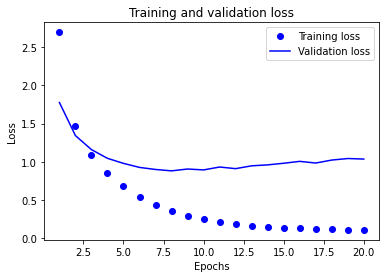

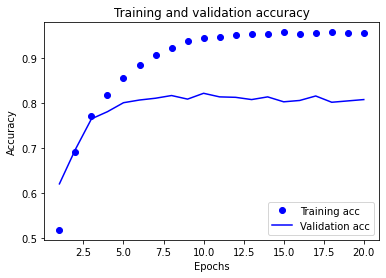

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 125us/sample - loss: 2.5280 - accuracy: 0.5350 - val_loss: 1.6365 - val_accuracy: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 64us/sample - loss: 1.3438 - accuracy: 0.7177 - val_loss: 1.2589 - val_accuracy: 0.7310
Epoch 3/8
7982/7982 [==============================] - 1s 65us/sample - loss: 0.9976 - accuracy: 0.7806 - val_loss: 1.1059 - val_accuracy: 0.7560
Epoch 4/8
7982/7982 [==============================] - 1s 70us/sample - loss: 0.7839 - accuracy: 0.8325 - val_loss: 1.0159 - val_accuracy: 0.7790
Epoch 5/8
7982/7982 [==============================] - 1s 67us/sample - loss: 0.6274 - accuracy: 0.8688 - val_loss: 1.0083 - val_accuracy: 0.7860
Epoch 6/8
7982/7982 [==============================] - 1s 70us/sample - loss: 0.5007 - accuracy: 0.8965 - val_loss: 0.9197 - val_accuracy: 0.8050
Epoch 7/8
7982/7982 [==============================] - 1s 67us/sample - los

In [9]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 78us/sample - loss: 0.9740 - accuracy: 0.7903


In [32]:
y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 140us/sample - loss: 2.6313 - accuracy: 0.5227 - val_loss: 1.7021 - val_accuracy: 0.6330
Epoch 2/8
7982/7982 [==============================] - 1s 64us/sample - loss: 1.4003 - accuracy: 0.6966 - val_loss: 1.3027 - val_accuracy: 0.7140
Epoch 3/8
7982/7982 [==============================] - 1s 64us/sample - loss: 1.0490 - accuracy: 0.7691 - val_loss: 1.1531 - val_accuracy: 0.7500
Epoch 4/8
7982/7982 [==============================] - 1s 69us/sample - loss: 0.8351 - accuracy: 0.8220 - val_loss: 1.0262 - val_accuracy: 0.7890
Epoch 5/8
7982/7982 [==============================] - 1s 71us/sample - loss: 0.6687 - accuracy: 0.8583 - val_loss: 0.9617 - val_accuracy: 0.8030
Epoch 6/8
7982/7982 [==============================] - 1s 67us/sample - loss: 0.5333 - accuracy: 0.8889 - val_loss: 0.9125 - val_accuracy: 0.8130
Epoch 7/8
7982/7982 [==============================] - 1s 65us/sample - los

In [30]:
pred_labels = np.argmax(model.predict(x_test), 1)

sum(pred_labels == test_labels)/len(pred_labels)

0.7911843276936776